### Etude de cas : Fraud transaction, test de recrutement **AXANCE Technology**



# **Mouhamadou KA**, Data Scientist
### mouhamadou740@gmail.com

## Etude du cas d'usage Fraud Transaction

# Classification problem

## Problem

Prédire la légitimité d'une transaction

## Data

Un dataset de transactions anonymisées labélisées comme frauduleuses ou innocentes

### Import des librairies

In [103]:
# Collecte , exploration et visualisation des données
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mise en forme et normalisation des données
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# metrique des modèles de classification
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, recall_score,classification_report
from sklearn.metrics import precision_recall_curve,average_precision_score



#Model de classification
from sklearn.linear_model import LogisticRegression
import xgboost,lightgbm


In [23]:
import warnings
warnings.filterwarnings('ignore')

# 1- Chargement des données
- Nous allons utiliser la bibliothèque pandas de python pour le chargement et l'analyse du jeux de données fourni

In [2]:
df=pd.read_csv('./D2FRecrutement/fraudulent_transaction/creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.columns,df.dtypes

(Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
        'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
        'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
        'Class'],
       dtype='object'), Time      float64
 V1        float64
 V2        float64
 V3        float64
 V4        float64
 V5        float64
 V6        float64
 V7        float64
 V8        float64
 V9        float64
 V10       float64
 V11       float64
 V12       float64
 V13       float64
 V14       float64
 V15       float64
 V16       float64
 V17       float64
 V18       float64
 V19       float64
 V20       float64
 V21       float64
 V22       float64
 V23       float64
 V24       float64
 V25       float64
 V26       float64
 V27       float64
 V28       float64
 Amount    float64
 Class       int64
 dtype: object)

## Exploration des données, statistiques descriptives

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

### Analyse des valeurs manquantes

In [8]:
null_count = df.isnull().sum().sort_values(ascending = False)
percent_null = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([null_count, percent_null], axis=1, keys=['null_count', 'percent_null'])


,null_count,percent_null
Class,0,0.0
V14,0,0.0
V1,0,0.0
V2,0,0.0
V3,0,0.0
V4,0,0.0
V5,0,0.0
V6,0,0.0
V7,0,0.0
V8,0,0.0


In [9]:
print(f" Le nombre d'observation dans le jeu de données est : {df.shape[0]}")
print(f" Le pourcentage de cas de non fraude  dans le jeu de données est : {round(df['Class'].value_counts()[0]/len(df) * 100,2)} %")
print(f" Le pourcentage de cas de  fraude avéré  dans le jeu de données est : {round(df['Class'].value_counts()[1]/len(df) * 100,2)} %")


 Le nombre d'observation dans le jeu de données est : 284807
 Le pourcentage de cas de non fraude  dans le jeu de données est : 99.83 %
 Le pourcentage de cas de  fraude avéré  dans le jeu de données est : 0.17 %


### Constats sur les données

- On constate qu il n y a pas de **valeurs manquantes dans les données** pour les différentes variables
-  On a 29 variables  numériques (features), une variable temporelle
- Même la vairiable temporelle est encodé numériquement
- On ne dispose pas de métadata pour comprendre la signification des 28 variables, probalement le résultat d'une décomposition en ACP
- La variable **Class (target)** est la variable binaire cible ici égale à 1 pour un cas de fraude avéré
- Le jeu de données est ***très déséquilibré*** avec très peu de cas de fraude : **0.17%** de cas

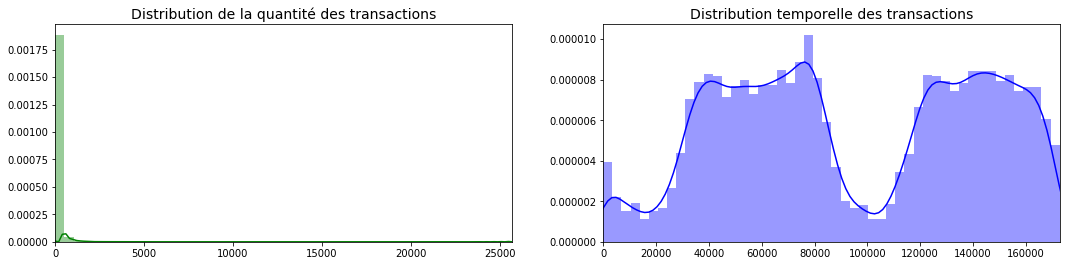

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='g')
ax[0].set_title('Distribution de la quantité des transactions', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution temporelle des transactions', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()

On constate au vu des distributions que les variables **Amount** et **Time** ne sont pas normalisés. Nous allons les normaliser dans la suite.

# Exploration des données

On dispose de peu d information sur les variables pour faire une analyse exploratoire et interpréter les résultats. On va normaliser les variables même si les 28 le sont déja.

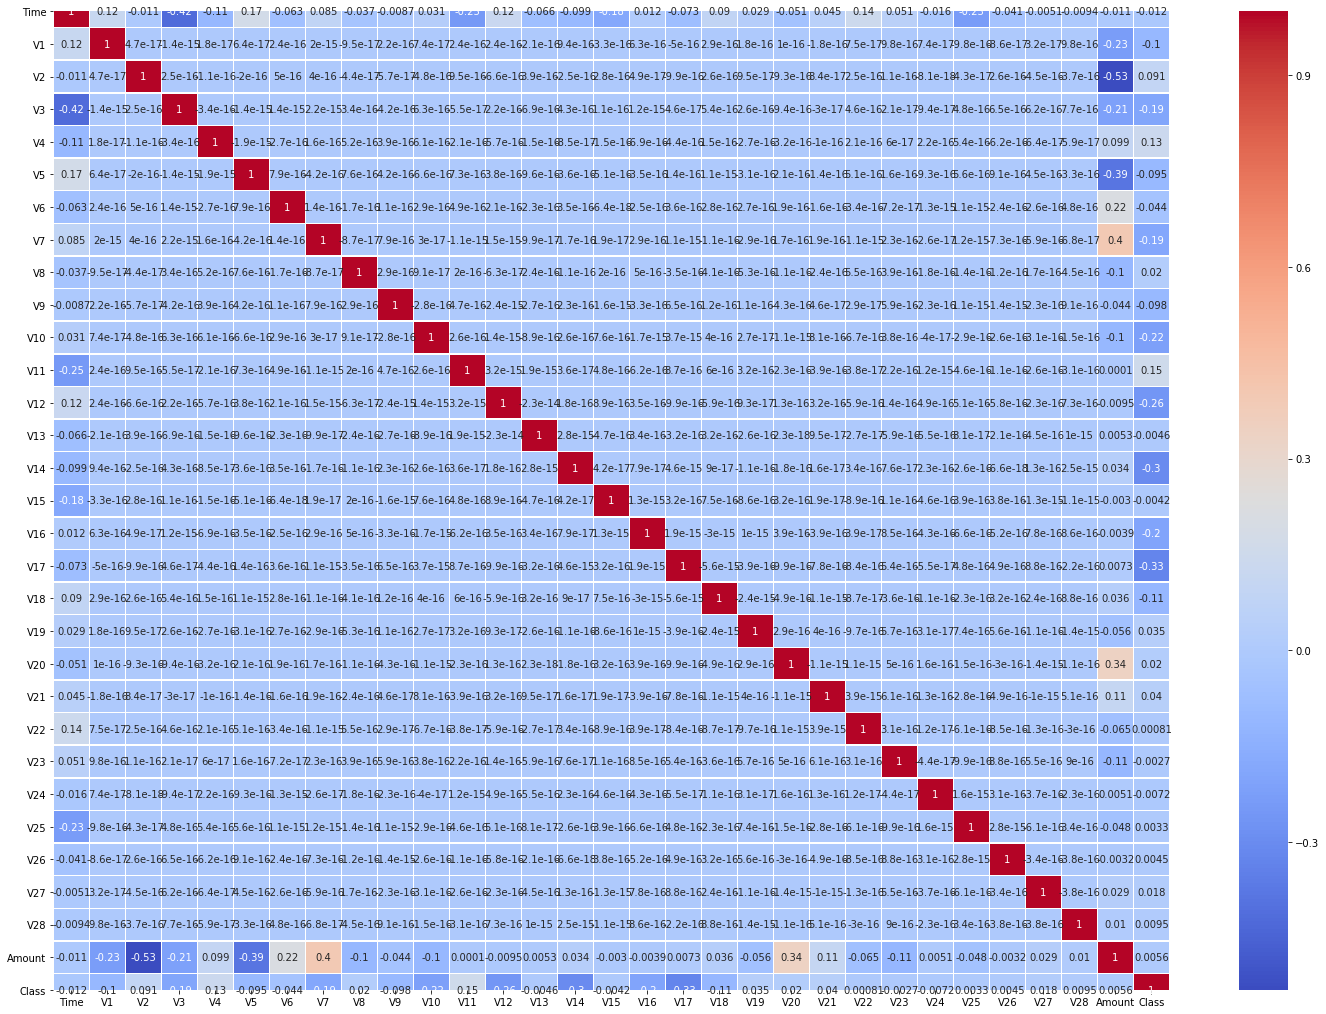

In [11]:
plt.figure(figsize=(25,18))
sns.heatmap(df.corr(),annot=True,linewidth = 0.5, cmap='coolwarm')

- On note certaines variables qui sont corrélées positivement  avec la variable cible Class et d autres qui sont corrélés négativement.
- Le manque  d information sur la variable Time et sa corrélation avec notre variable cible nous passe à éliminer cette variable dans la suite de notre étude.

### Standardisation des variables et décomposition en train & test

In [12]:
# On ne considère pas la variable Time pour la suite
data=df[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
        'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
        'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
        'Class']]
ncols=len(list(data.columns))-1
X = data.iloc[:,0:ncols].values # ensemble des observations
y = data.iloc[0:,ncols].values  # variable cible à prédire
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 0) 

In [13]:
scaler = StandardScaler() #initialisation de l estimateur de normalisation
X_train = scaler.fit_transform(X_train) 
X_test = scaler.fit_transform(X_test)


# Choix du modèle et des métriques de validation de nos modèles

### Le jeu de données de cas de fraude est très déséquilibré (0.17% de cas de cas de fraude uniquement: donc des métriques comme l accuracy ne sont pas utiles.
### L'objectif ici est de détecter le maximum de cas de fraude donc ce qui nous intéresse ce sera plutôt le **Recall** ou le F1 score ou encore l'**AUCPR** (Area Undeer thhe Cure Precision Recall) qui sont appropriés pour un cas de skewed dataset comme le notre (la classe d intérêt est la classe minoritaire).

# -  **``F1 = 2 * (precision * recall) / (precision + recall)``**
# - Le **Recall** est le ratio **``tp / (tp + fn)``** où **``tp``** est le nombre de vrais positifs **``fn``** le nombre de faux négatifs. Cette métrique mesure la capacité du modèle à identifier correctement la classe d'intérêt qui la fraude sur les transactions bancaires.

In [ ]:
#X_train.shape,X_test.shape,y_train.shape,y_test.shape  #taille des données d'netraienemnt et de test

print(f"taille du jeu de données d'entrainement: {X_train.shape}")
print(f"taille du jeu de données de test: {X_test.shape}")
print(f"taille de la variable cible d apprentissage : {y_train.shape}")
print(f"taille ed la variable cible de test {y_test.shape}")

### Application d'un premier modèle **Baseline** sur les données sans prise en compte du déséquilibre de classe

### Logistic regression

- Nous avons un cas de classification binaire, nous utilisons un modèle de régression logistique comme modèle initiale de base de notre étude
- Comme métrique d evaluation, nous considérerons la **matrice de confusion** et les score de **Recall** et **F1**

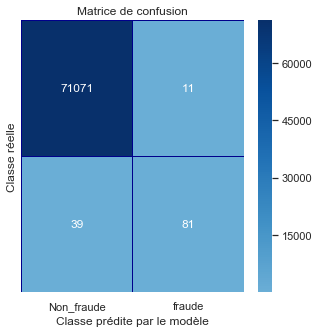

In [102]:
model = LogisticRegression()
model.fit(X_train, y_train.ravel()) # entrainement du modèle
## Prediction du modèle sur les données de test
pred = model.predict(X_test)
class_names = ['Non_fraude', 'fraude']
matrix = confusion_matrix(y_test, pred)
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
# Création de la matrice  de confusion
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(dataframe,
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues",center=0,fmt="d",xticklabels=class_names, yticklabels=False)
plt.title("Matrice de confusion"),
#plt.tight_layout()
plt.ylabel("Classe réelle"), plt.xlabel("Classe prédite par le modèle")
plt.show()



### classification report du modèle

In [104]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71082
           1       0.88      0.68      0.76       120

    accuracy                           1.00     71202
   macro avg       0.94      0.84      0.88     71202
weighted avg       1.00      1.00      1.00     71202



## Evalution du modèle baseline : recall , F1 score et AUCPR

In [18]:
print(f"Recall du modèle Logistic Regression : {round(recall_score(y_test, pred), 2)}")
print(f"F1 Score du modèle Logistic Regression : {round(f1_score(y_test, pred), 2)}")
av_score = average_precision_score(y_test, pred) 
print(f"Average Precision Score : {round(av_score,2)}" ) 

Recall du modèle Logistic Regression : 0.68
F1 Score du modèle Logistic Regression : 0.76
Average Precision Score : 0.59


#### Réprésentation de la courbe **precision-recall**

In [19]:
precision, recall, _ = precision_recall_curve(y_test, pred) 



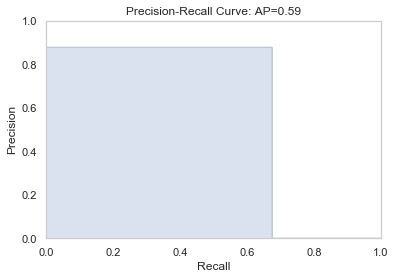

In [75]:
sns.set_style("whitegrid", {'axes.grid' : False})
plt.step(recall, precision, color='grey', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b') 
plt.xlabel('Recall') 
plt.ylabel('Precision') 
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0]) 
plt.title(f'Precision-Recall Curve: AP={round(av_score,2)}')
plt.show()

### On a un **Recall de 0.67** ce qui signifie que le modèle considère **33% de fraudeurs** comme de cas de non fraude ce qui est énorme !!! 
### En d'autres termes le score du recall signifie que le modèle identifie correctement uniquement 67% des cas de fraude sur les données de test
### Nous allons essayer d'améliorer ce résultat.

Pour la prise en compte du jeu de données déséquilibré, nous allons utiliser une methode de **SMOTE** (synthetic minority oversampling technique) qui va permettre de créer par une approche des plus proches voisins, de nouvelles cas de fraude qui sont selon la distributions des cas de fraude connu.
Nous allons tester les algorithmes avec ou sans SMOTE pour évaluer la performance des modèles.

## Equilibrage du jeu de données par SMOTE

In [61]:
from imblearn.over_sampling import SMOTE # on va créeer de nouveaux cas artificielles de fraude pour améliorer 
# les performances de nos modèles

ratio=0.5
X_resampled_smote, y_resampled_smote = SMOTE(sampling_strategy=ratio,k_neighbors=5).fit_resample(X_train, y_train)
data_smote=pd.DataFrame(data=X_resampled_smote,columns=[ c for c in data.columns if c!= 'Class'])
data_smote['Class']=y_resampled_smote

In [63]:
data_smote.isnull().sum

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [66]:
print(f" Le nombre d'observations dans le jeu de données après SMOTE est : {data_smote.shape[0]}")
print(f" Le pourcentage de cas de non fraude  dans le jeu de données après SMOTE est : {round(data_smote['Class'].value_counts()[0]/len(data_smote) * 100,2)} %")
print(f" Le pourcentage de cas de  fraude avéré  dans le jeu de données après SMOTE est : {round(data_smote['Class'].value_counts()[1]/len(data_smote) * 100,2)} %")


 Le nombre d'observations dans le jeu de données après SMOTE est : 319849
 Le pourcentage de cas de non fraude  dans le jeu de données après SMOTE est : 66.67 %
 Le pourcentage de cas de  fraude avéré  dans le jeu de données après SMOTE est : 33.33 %


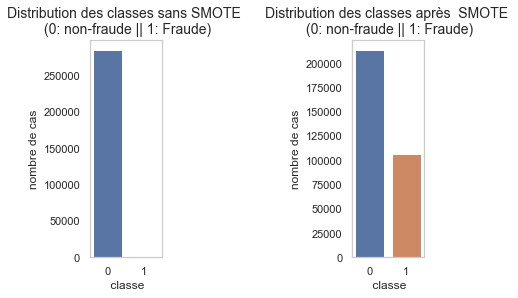

In [85]:
colors = ["g", "r"]
plt.subplot(141)
#plt.figure(figsize=(8, 6))
sns.set(style=None,rc=None)
sns.countplot('Class', data=df)
plt.xlabel(" classe")
plt.ylabel("nombre de cas")
plt.title('Distribution des classes sans SMOTE \n (0: non-fraude || 1: Fraude)', fontsize=14)

plt.subplot(144)
#plt.figure(figsize=(8, 6))
sns.set(style=None,rc=None)
sns.countplot('Class', data=data_smote)
plt.title('Distribution des classes après  SMOTE \n (0: non-fraude || 1: Fraude)', fontsize=14)
plt.xlabel(" classe")
plt.ylabel("nombre de cas")
plt.show()




#plt.savefig('grid_figure.pdf')

### On constate que l'algorithme SMOTE permet de bien équilibrer les classes

## Algorithe à tester : Lightgbm, xgboost, logistic Regression
- Nous allons tester les algorithmes les plus performant pour ce genre de problème de classification binaire

In [106]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "Lightgbm": lightgbm.LGBMClassifier(),
    "Xgboost":xgboost.XGBClassifier()
}

# Entrainement des modèles (Xgboost,LightGBM, Logistic regression)

In [109]:
classifiers["Xgboost"].fit(X_resampled_smote,y_resampled_smote)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [110]:
classifiers["Lightgbm"].fit(X_resampled_smote,y_resampled_smote)


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [111]:
classifiers["LogisiticRegression"].fit(X_resampled_smote,y_resampled_smote)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [119]:
y_pred_reg_cf=classifiers["LogisiticRegression"].predict(X_test)
y_pred_xgboost_cf=classifiers["Xgboost"].predict(X_test)
y_pred_lgbm_cf=classifiers["Lightgbm"].predict(X_test)

## Matrice de confusion des 3 modèles

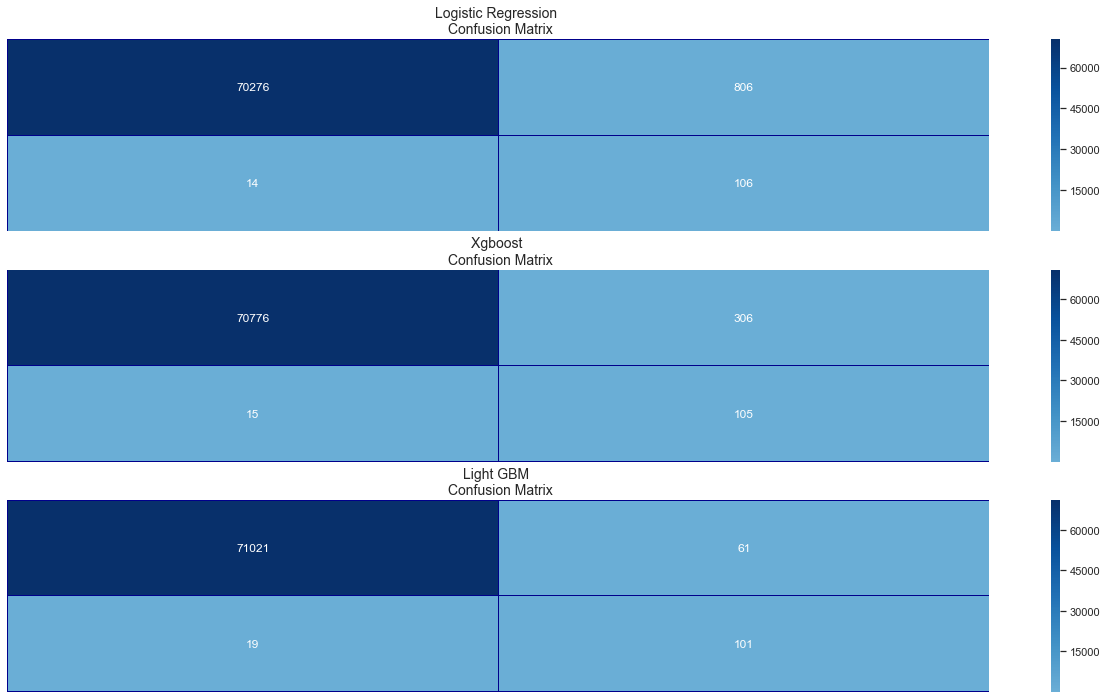

In [130]:
log_reg_cf = confusion_matrix(y_test, y_pred_reg_cf)
xgboost_cf = confusion_matrix(y_test, y_pred_xgboost_cf)
lgbm_cf = confusion_matrix(y_test, y_pred_lgbm_cf)


fig, ax = plt.subplots(3,1,figsize=(22,12),squeeze=False)


sns.heatmap(log_reg_cf, ax=ax[0][0], annot=True, linewidths=.2,linecolor="Darkblue", cmap="Blues",center=0,fmt="d",xticklabels=class_names, yticklabels=False)
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(xgboost_cf, ax=ax[1][0], annot=True, linewidths=.2,linecolor="Darkblue", cmap="Blues",center=0,fmt="d",xticklabels=class_names, yticklabels=False)
ax[1][0].set_title("Xgboost \n Confusion Matrix", fontsize=14)
ax[1][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(lgbm_cf, ax=ax[2][0],annot=True, linewidths=.2,linecolor="Darkblue", cmap="Blues",center=0,fmt="d",xticklabels=class_names, yticklabels=False)
ax[2][0].set_title("Light GBM \n Confusion Matrix", fontsize=14)
ax[2][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[2][0].set_yticklabels(['', ''], fontsize=14, rotation=360)

plt.show()


In [122]:
from sklearn.metrics import classification_report


print('Logistic Regression:')
print(classification_report(y_test, y_pred_reg_cf))

print('Xgboost:')
print(classification_report(y_test, y_pred_xgboost_cf))

print('Light GBM:')
print(classification_report(y_test, y_pred_lgbm_cf))



Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     71082
           1       0.12      0.88      0.21       120

    accuracy                           0.99     71202
   macro avg       0.56      0.94      0.60     71202
weighted avg       1.00      0.99      0.99     71202

Xgboost:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71082
           1       0.26      0.88      0.40       120

    accuracy                           1.00     71202
   macro avg       0.63      0.94      0.70     71202
weighted avg       1.00      1.00      1.00     71202

Light GBM:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71082
           1       0.62      0.84      0.72       120

    accuracy                           1.00     71202
   macro avg       0.81      0.92      0.86     71202
weighted avg       1.00      1.00

# evaluation des modèles via Recall et F1 score

In [139]:
recall_xgboost= round(recall_score(y_test, y_pred_xgboost_cf),2)
recall_lgbm = round(recall_score(y_test, y_pred_lgbm_cf),2)
recall_lr = round(recall_score(y_test, y_pred_reg_cf),2)

f1_xgboost= round(f1_score(y_test, y_pred_xgboost_cf),2)
f1_lgbm = round(f1_score(y_test, y_pred_lgbm_cf),2)
f1_lr = round(f1_score(y_test, y_pred_reg_cf),2)


In [140]:
print("*"*45)
print(f" Xgboost Recall score : {recall_xgboost}")
print(f" light gbm Recall score : {recall_lgbm}")
print(f" Logistic Regression Recall score : {recall_lr}")

print("*"*45)

print(f" Xgboost F1 score : {f1_xgboost}")
print(f" light gbm F1 score : {f1_lgbm}")
print(f" Logistic Regression F1 score : {f1_lr}")



*********************************************
 Xgboost Recall score : 0.88
 light gbm Recall score : 0.84
 Logistic Regression Recall score : 0.88
*********************************************
 Xgboost F1 score : 0.4
 light gbm F1 score : 0.72
 Logistic Regression F1 score : 0.21


- On constate que le Light Gradient Boosting Model donne les meilleurs résultats de prédiction des cas de fraude.
- Une phase de tuning des paramètres et de validation croisée pourrait permettre d'améliorer encore les résulats du modèle.
- L'approche d'échantillonnage (SMOTE) que nous avons utilisés a permis d'améliorer considérablement les résultats par rapport au modèle baseline

## Poids des différentes variables dans les prédictions (Feature Importance)

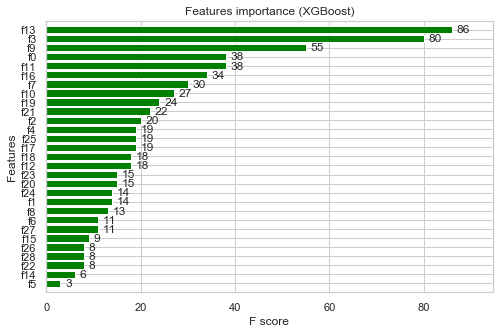

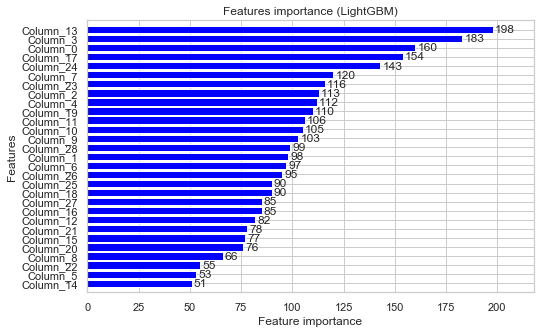

In [133]:
fig, (ax) = plt.subplots(ncols=1, figsize=(8,5))
xgboost.plot_importance(classifiers['Xgboost'], height=0.8, title="Features importance (XGBoost)", ax=ax, color="green") 
plt.show()

fig, (ax) = plt.subplots(ncols=1, figsize=(8,5))
lightgbm.plot_importance(classifiers['Lightgbm'], height=0.8, title="Features importance (LightGBM)", ax=ax,color="blue") 
plt.show()

### On constate que les variables V13 et V3 sont les plus prédictives et jouent un rôle prépondérant sur les cas de fraude.